# Tarjetas

dataset: https://docs.google.com/spreadsheets/d/1E2QvH18DyNDw1eGqU40D_KHSEfSzbipV/edit?usp=sharing&ouid=115931210603772521641&rtpof=true&sd=true


In [1]:
import pandas as pd
import numpy
#!pip install openpyxl

In [2]:
%pwd

'C:\\Users\\alejo\\UCEMA\\poo_teorica\\poo_ejercicios\\ejercicios_extra'

In [3]:
tarjetas = pd.read_csv('../04-transformaciones/data/tarjetas.xlsx - Sheet1.csv', delimiter=',', index_col='Unnamed: 0')

In [4]:
tarjetas.head()

,PreseTaciOn_Fecha,FeCha_de_Pago,cod_clearing,desc_creaing,NRo_Liquidacion,cod_sucursal,Cod_comercio,Cod_pagadora,Cod_marca_producto,importe_concepto
0,2022-06-15 00:00:00,2022-07-01 00:00:00,1009,VENTAS C/DESCUENTO CONTADO,27822,716,25107406,156,VISA CREDITO,5096.00
1,2022-06-15 00:00:00,2022-07-01 00:00:00,1011,VENTAS C/DTO CUOTAS FINANC. OTORG.,27822,716,25107406,156,VISA CREDITO,413500.60
2,2022-06-15 00:00:00,2022-07-01 00:00:00,2031,ARANCEL,27822,716,25107406,156,VISA CREDITO,7534.70
3,2022-06-15 00:00:00,2022-07-01 00:00:00,2040,PROMO CUOTAS AHORA 12/18,27822,716,25107406,156,VISA CREDITO,18416.85
4,2022-06-15 00:00:00,2022-07-01 00:00:00,2800,TOTAL DEDUCCIONES,27822,716,25107406,156,VISA CREDITO,49585.43


### 1- Pasar todos los nombres de las columnas a minusculas

In [5]:
#cambio el nombre de las columnas y lo guardo en la columna original
tarjetas.columns= tarjetas.columns.str.lower()

In [6]:
tarjetas.columns

Index(['presetacion_fecha', 'fecha_de_pago', 'cod_clearing', 'desc_creaing',
       'nro_liquidacion', 'cod_sucursal', 'cod_comercio', 'cod_pagadora',
       'cod_marca_producto', 'importe_concepto'],
      dtype='object')

### 2-Cuantas sucursales únicas hay? ¿Cuáles?

In [7]:
# metodo unique para obtener los elementos de la columna sucursales sin repeticion
tarjetas.cod_sucursal.unique()

array([716,  98, 671, 519, 241], dtype=int64)

### 3- Cuantas tarjetas de crédito distitas hay? ¿Cuáles?
¿Se te ocurre un nombre mejor para esa columna?

In [8]:
# metodo rename para renombrar, uso el parametro columns para renombrar la columna que se pasa por diccionario, y lo guardo en un nuevo DF
df = tarjetas.rename(columns={'cod_marca_producto':'procesador_de_pago'})

In [11]:
# uso el metodo unique de nuevo para ver todas las procesadoras de pago, luego uso un ciclo for para imprimir por pantalla los elementos unicos de la columna
procesador = df.procesador_de_pago.unique()
[print(i) for i in procesador]

VISA CREDITO
VISA DEBITO
MASTERCARD
MASTERCARD DEBIT
MAESTRO
ARGENCARD


[None, None, None, None, None, None]

In [12]:
# uso el metodo contains para traer de la columna procesador_de_pago todos los elementos que contengan 'CREDITO'
mask_credit_card = df['procesador_de_pago'].str.contains(pat= ' CREDITO')
df.procesador_de_pago[mask_credit_card].unique()


array(['VISA CREDITO'], dtype=object)

### 4- Cuants filas y columnas hay?


In [11]:
df.shape

(47280, 10)

### 5- ¿Cuanto suma el total de importe_concepto?


In [13]:
total_importe= df.importe_concepto.sum()

print(f'Suma total de importe_concepto: {"{:,}".format(total_importe)}')

Suma total de importe_concepto: 4,145,618,332.503


### 6- ¿Cuanto dinero se cobro por mes? Cree un lineplot para gráficarlo


In [14]:
#convierto la columna a datetime, infer_datetime_format te reconoce el formato en que viene la fecha
df['fecha_de_pago'] =  pd.to_datetime(df['fecha_de_pago'], infer_datetime_format=True)

In [18]:
#hago la suma por mes usando groupby, pero todos los registros son del mismo mes
by_month = df.groupby(df.fecha_de_pago.dt.month)

suma_importe_mes= by_month.sum()['importe_concepto'].to_frame(name='suma mes')
suma_importe_mes

,suma mes
fecha_de_pago,
7,4.145618e+09


<AxesSubplot:xlabel='fecha_de_pago'>

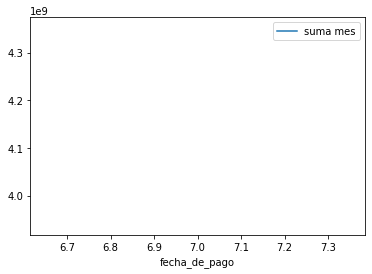

In [20]:
#creo un grafico de linea con el importe por mes, pero al ser un solo mes no va a devuelve un grafico vacio
suma_importe_mes.plot(kind="line")


In [21]:
#al ser todos los registros de un mismo mes me parece mas interesante ver el importe por dia
by_day = df.groupby(df.fecha_de_pago.dt.day)

suma_importe_dia= by_day.sum()['importe_concepto'].to_frame(name='suma dia')
suma_importe_dia

,suma dia
fecha_de_pago,
1,1.473177e+08
4,1.976693e+08
5,7.024681e+08
6,1.002753e+08
7,1.116222e+08
8,1.465996e+08
11,2.870652e+08
12,2.403649e+08
13,1.227566e+08


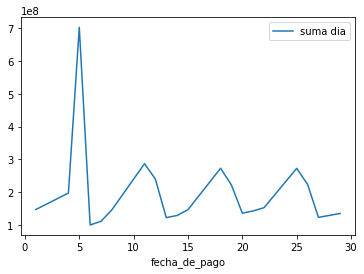

In [22]:
#creo el mismo grafico de linea pero con el importe por dia
plot_importe_dia = suma_importe_dia.plot(kind="line")


### 7- Cuanto dinero se cobro por sucursal?


In [23]:
# chequeo cuantas sucursales hay
df.cod_sucursal.unique()


array([716,  98, 671, 519, 241], dtype=int64)

In [24]:
# agrupo por sucursal y hago la suma de la columna importe_concepto
importe_sucursal = df.groupby('cod_sucursal').sum()['importe_concepto'].to_frame(name='importe total')
importe_sucursal

,importe total
cod_sucursal,
98,1.401451e+08
241,9.773019e+05
519,3.621125e+09
671,2.418829e+08
716,1.414878e+08


### 8- Cuanto dinero se cobro por mes por sucursal?


In [25]:
#creo variables con las columnas de fecha por mes y la de sucursal para usarlas en el groupby
month= df.fecha_de_pago.dt.month
sucursal= df.cod_sucursal

importe_x_mes_sucursal= df.groupby(by=[month, sucursal]).sum()['importe_concepto']
importe_x_mes_sucursal

fecha_de_pago  cod_sucursal
7              98              1.401451e+08
               241             9.773019e+05
               519             3.621125e+09
               671             2.418829e+08
               716             1.414878e+08
Name: importe_concepto, dtype: float64

In [26]:
#repite el paso anterior pero por dia
day= df.fecha_de_pago.dt.day

df.groupby(by=[day, sucursal]).sum()['importe_concepto']


fecha_de_pago  cod_sucursal
1              98              3.669431e+06
               519             1.312675e+08
               671             7.608022e+06
               716             4.772726e+06
4              98              6.478613e+06
                                   ...     
29             98              4.980121e+06
               241             2.472456e+04
               519             1.182347e+08
               671             6.924635e+06
               716             5.308723e+06
Name: importe_concepto, Length: 91, dtype: float64

### 9- Cuanto dinero se cobro por mes por sucursal y por descreaing?

In [27]:
df.columns


Index(['presetacion_fecha', 'fecha_de_pago', 'cod_clearing', 'desc_creaing',
       'nro_liquidacion', 'cod_sucursal', 'cod_comercio', 'cod_pagadora',
       'procesador_de_pago', 'importe_concepto'],
      dtype='object')

In [28]:
descreaing= df.desc_creaing

df.groupby(by=[month, sucursal, descreaing]).sum()['importe_concepto'].to_frame(name='sum')


sum
fecha_de_pago cod_sucursal desc_creaing                                              
7             98            PERCEPCION IVA R.G. 2408   3,00 %            1.133729e+04
                           AJUSTE SIRTAC JUL. 1RA QUINC                  1.861809e+04
                           ARANCEL                                       4.826957e+05
                           CRED FISCAL AHORA 12/18 VTA EN CUOTAS 10,50%  9.107601e+04
                           CRED. FISCAL PAG.S/DTO.FIN.OTORG 21,00%       3.315445e+04
...                                                                               ...
              716          SUBTOTAL NETO DE PAGOS                        3.279938e+07
                           TOTAL DEDUCCIONES                             3.392830e+06
                           TOTAL LIQUIDACION                             3.277539e+07
                           VENTAS C/DESCUENTO CONTADO                    1.665725e+07
                           VENTAS C/DTO CUOTAS FINANC. OTORG.            1.951097e+07

[135 rows x 1 columns]

### 10- Pase a columnas los valores presentes en desc_creaing y ponga los importes como valores y en el indice la fecha de pago y el codigo de comercio

In [29]:
#encontre esta manera de hacerlo, usando groupby y unstack a la columna desc_creaing
df.groupby(['fecha_de_pago', 'cod_comercio','desc_creaing'])['importe_concepto'].sum().unstack('desc_creaing')

desc_creaing                 PERCEPCION IVA R.G. 2408   3,00 %  \
fecha_de_pago cod_comercio                                       
2022-07-01    4547438                                  3517.63   
              14935528                                     NaN   
              14935556                                     NaN   
              14935569                                     NaN   
              15537297                                   80.55   
...                                                        ...   
2022-07-29    25108471                                   94.32   
              25108573                                   96.97   
              25877861                                     NaN   
              25892842                                  313.88   
              25892918                                  120.94   

desc_creaing                AJUSTE SIRTAC JUL. 1RA QUINC  \
fecha_de_pago cod_comercio                                 
2022-07-01    4547438                                NaN   
              14935528                               NaN   
              14935556                               NaN   
              14935569                               NaN   
              15537297                               NaN   
...                                                  ...   
2022-07-29    25108471                               NaN   
              25108573                               NaN   
              25877861                               NaN   
              25892842                               NaN   
              25892918                               NaN   

desc_creaing                AJUSTE SIRTAC JUNIO 2DA QUINC  \
fecha_de_pago cod_comercio                                  
2022-07-01    4547438                                 NaN   
              14935528                                NaN   
              14935556                                NaN   
              14935569                                NaN   
              15537297                                NaN   
...                                                   ...   
2022-07-29    25108471                                NaN   
              25108573                                NaN   
              25877861                                NaN   
              25892842                                NaN   
              25892918                                NaN   

desc_creaing                ARANCEL                                       \
fecha_de_pago cod_comercio                                                 
2022-07-01    4547438                                          136195.74   
              14935528                                             44.98   
              14935556                                            170.95   
              14935569                                            428.31   
              15537297                                           2685.16   
...                                                                  ...   
2022-07-29    25108471                                           3204.65   
              25108573                                           3838.58   
              25877861                                            114.09   
              25892842                                          11774.38   
              25892918                                           4823.25   

desc_creaing                CARGO  SISTEMA CUOTAS MENS                    \
fecha_de_pago cod_comercio                                                 
2022-07-01    4547438                                                NaN   
              14935528                                               NaN   
              14935556                                               NaN   
              14935569                                               NaN   
              15537297                                               NaN   
...                                          

In [30]:
#uso el metodo pivot_table para poner en columnas los valores de desc_creaing, como valores los importes y como infices fecha y comercio
pd.pivot_table(df,columns='desc_creaing',values='importe_concepto', index=['fecha_de_pago','cod_comercio'])


desc_creaing                 PERCEPCION IVA R.G. 2408   3,00 %  \
fecha_de_pago cod_comercio                                       
2022-07-01    4547438                              1172.543333   
              14935528                                     NaN   
              14935556                                     NaN   
              14935569                                     NaN   
              15537297                               80.550000   
...                                                        ...   
2022-07-29    25108471                               94.320000   
              25108573                               96.970000   
              25877861                                     NaN   
              25892842                              313.880000   
              25892918                              120.940000   

desc_creaing                AJUSTE SIRTAC JUL. 1RA QUINC  \
fecha_de_pago cod_comercio                                 
2022-07-01    4547438                                NaN   
              14935528                               NaN   
              14935556                               NaN   
              14935569                               NaN   
              15537297                               NaN   
...                                                  ...   
2022-07-29    25108471                               NaN   
              25108573                               NaN   
              25877861                               NaN   
              25892842                               NaN   
              25892918                               NaN   

desc_creaing                AJUSTE SIRTAC JUNIO 2DA QUINC  \
fecha_de_pago cod_comercio                                  
2022-07-01    4547438                                 NaN   
              14935528                                NaN   
              14935556                                NaN   
              14935569                                NaN   
              15537297                                NaN   
...                                                   ...   
2022-07-29    25108471                                NaN   
              25108573                                NaN   
              25877861                                NaN   
              25892842                                NaN   
              25892918                                NaN   

desc_creaing                ARANCEL                                       \
fecha_de_pago cod_comercio                                                 
2022-07-01    4547438                                          27239.148   
              14935528                                            44.980   
              14935556                                           170.950   
              14935569                                           428.310   
              15537297                                          2685.160   
...                                                                  ...   
2022-07-29    25108471                                          1602.325   
              25108573                                          1919.290   
              25877861                                           114.090   
              25892842                                          5887.190   
              25892918                                          2411.625   

desc_creaing                CARGO  SISTEMA CUOTAS MENS                    \
fecha_de_pago cod_comercio                                                 
2022-07-01    4547438                                                NaN   
              14935528                                               NaN   
              14935556                                               NaN   
              14935569                                               NaN   
              15537297                                               NaN   
...                                          

### 11- Quedarse solo con tarjeta visa. Crear una columna que sume 'VENTAS C/DESCUENTO CONTADO' con
                                'VENTAS C/DTO CUOTAS FINANC. OTORG.'

In [31]:
#creo una mascara donde procesador_de_pago sea igual a VISA para filtrar luego en el df
mask_visa = df['procesador_de_pago'].str.contains('VISA')

#uso el metodo pivot_table como en el ejercicio anterior, usando el df filtrado con la mascara
df_solo_visa = pd.pivot_table(df[mask_visa],columns='desc_creaing',values='importe_concepto', index=['fecha_de_pago','cod_comercio'])

#creo una nueva columna a partir de la suma de otras dos
df_solo_visa['ventas con descuento'] = df_solo_visa['VENTAS C/DESCUENTO CONTADO                  '] + df_solo_visa['VENTAS C/DTO CUOTAS FINANC. OTORG.          ']
df_solo_visa['ventas con descuento']

fecha_de_pago  cod_comercio
2022-07-01     25098024        466353.970000
               25107096        184476.023333
               25107105        402094.000000
               25107118        498690.760000
               25107120        221920.300000
                                   ...      
2022-07-29     25108471        177444.200000
               25108573        216342.000000
               25877861                  NaN
               25892842        649949.730000
               25892918        269041.040000
Name: ventas con descuento, Length: 1183, dtype: float64

### 12- Quedarse solo con la tarjeta mastercard y crear una columna que sea la suma de 'PERCEPCION IVA R.G. 2408   1,50 %' y  'PERCEPCION IVA R.G. 2408   3,00 %'

In [32]:
#repito los pasos del ejercicio anterior pero filtrando 'Mastercard'
mask_mastercard = df['procesador_de_pago'].str.contains('MASTERCARD')
df_solo_master = pd.pivot_table(df[mask_mastercard],columns='desc_creaing',values='importe_concepto', index=['fecha_de_pago','cod_comercio'])
df_solo_master['percepcion iva'] = df_solo_master['PERCEPCION IVA R.G. 2408   1,50 %'] + df_solo_master[' PERCEPCION IVA R.G. 2408   3,00 %']
df_solo_master

desc_creaing                 PERCEPCION IVA R.G. 2408   3,00 %  \
fecha_de_pago cod_comercio                                       
2022-07-01    4547438                              1172.543333   
              14935528                                     NaN   
              14935556                                     NaN   
              14935569                                     NaN   
              15537297                               80.550000   
...                                                        ...   
2022-07-29    15589105                                     NaN   
              15589118                                     NaN   
              16378521                                     NaN   
              19265106                                     NaN   
              19273970                                     NaN   

desc_creaing                AJUSTE SIRTAC JUL. 1RA QUINC  \
fecha_de_pago cod_comercio                                 
2022-07-01    4547438                                NaN   
              14935528                               NaN   
              14935556                               NaN   
              14935569                               NaN   
              15537297                               NaN   
...                                                  ...   
2022-07-29    15589105                               NaN   
              15589118                               NaN   
              16378521                               NaN   
              19265106                               NaN   
              19273970                               NaN   

desc_creaing                AJUSTE SIRTAC JUNIO 2DA QUINC  \
fecha_de_pago cod_comercio                                  
2022-07-01    4547438                                 NaN   
              14935528                                NaN   
              14935556                                NaN   
              14935569                                NaN   
              15537297                                NaN   
...                                                   ...   
2022-07-29    15589105                                NaN   
              15589118                                NaN   
              16378521                                NaN   
              19265106                                NaN   
              19273970                                NaN   

desc_creaing                ARANCEL                                       \
fecha_de_pago cod_comercio                                                 
2022-07-01    4547438                                          29733.925   
              14935528                                            44.980   
              14935556                                           170.950   
              14935569                                           428.310   
              15537297                                          2685.160   
...                                                                  ...   
2022-07-29    15589105                                           800.220   
              15589118                                           335.930   
              16378521                                            93.930   
              19265106                                           115.160   
              19273970                                           576.000   

desc_creaing                CARGO  SISTEMA CUOTAS MENS                    \
fecha_de_pago cod_comercio                                                 
2022-07-01    4547438                                                NaN   
              14935528                                               NaN   
              14935556                                               NaN   
              14935569                                               NaN   
              15537297                                               NaN   
...                                          

### Guardar como datasets
a- el dataset de la tarjeta visa
b- el dataset de la tarjeta mastercard
c- cuanto dinero se cobra por mes y por sucursal
d- cuanto se cobra por mes
e- crear un lineplot de cuanto se cobra por mes

In [33]:
%pwd

'C:\\Users\\alejo\\UCEMA\\poo_teorica\\poo_ejercicios\\04-transformaciones'

In [34]:
#a
df_solo_visa.to_csv('data/only_visa.csv')
#b
df_solo_master.to_csv('data/only_mastercard.csv')


In [35]:
#c - importe por mes y sucursal
importe_x_mes_sucursal.to_csv('data/importe_mes_sucursal.csv')
importe_x_mes_sucursal

fecha_de_pago  cod_sucursal
7              98              1.401451e+08
               241             9.773019e+05
               519             3.621125e+09
               671             2.418829e+08
               716             1.414878e+08
Name: importe_concepto, dtype: float64

In [36]:
#d - importe por mes
suma_importe_mes.to_csv('data/importe_mes.csv')
suma_importe_mes


,suma mes
fecha_de_pago,
7,4.145618e+09


In [37]:
from matplotlib import pyplot as plt

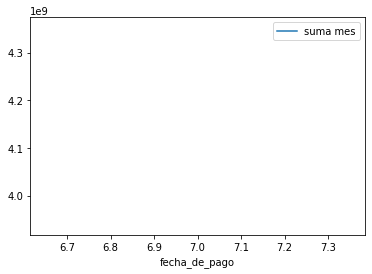

In [38]:
#e - lineplot importe por mes
fig = suma_importe_mes.plot(kind="line")

plt.savefig('data/importe_mes.png')

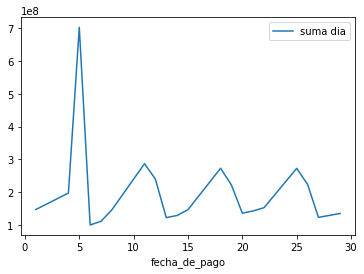

In [39]:
#e - lineplot importe por dia
fig = suma_importe_dia.plot(kind="line")

plt.savefig('data/importe_dia.png')